<a href="https://colab.research.google.com/github/pradiptars/ML_Spacet_Titanic/blob/main/Spaceticanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
df = pd.concat([train, test], axis=0)

<Axes: >

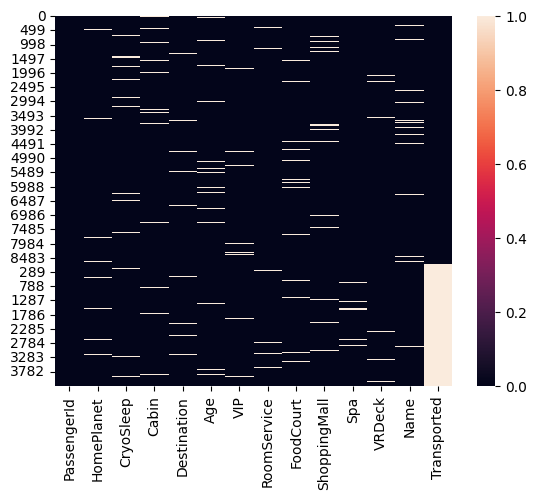

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
def split_cabin(x):
   if len(str(x).split('/')) < 3:
    return ['Missing', 'Missing', 'Missing']
   else:
    return str(x).split('/')

In [ ]:
df['TempCabin'] = df['Cabin'].apply(lambda x : split_cabin(x))

In [ ]:
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TempCabin
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,"[B, 0, P]"
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,"[F, 0, S]"


In [ ]:
df['TempCabin'] = df['Cabin'].apply(lambda x : split_cabin(x))
df['Deck'] = df['TempCabin'].apply(lambda x : x[0])
df['Side'] = df['TempCabin'].apply(lambda x : x[2])
df.drop('TempCabin', axis=1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,Missing,Missing
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,P
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,P


In [ ]:
#filling missing value
df['HomePlanet'] = df['HomePlanet'].fillna('Missing')
df['Deck'] = df['Deck'].fillna('Missing')
df['Side'] = df['Side'].fillna('Missing')

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['VIP'] = df['VIP'].fillna(False)

df['CryoSleep'] = df['CryoSleep'].fillna(False)
df['Destination'] = df['Destination'].fillna('Missing')

df['RoomService'] = df['RoomService'].fillna(0)
df['FoodCourt'] = df['FoodCourt'].fillna(0)
df['ShoppingMall'] = df['ShoppingMall'].fillna(0)
df['Spa'] = df['Spa'].fillna(0)
df['VRDeck'] = df['VRDeck'].fillna(0)


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop(['Name', 'Cabin', 'TempCabin'], axis=1, inplace=True)

In [ ]:
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S


<Axes: >

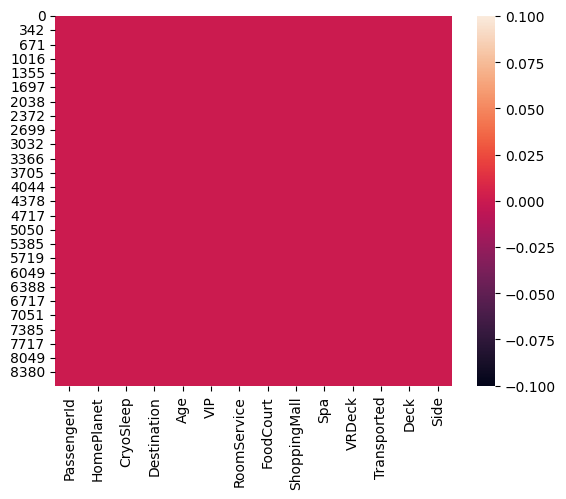

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
X = df.drop('Transported', axis=1)
y = df['Transported']

In [ ]:
X = pd.get_dummies(X, columns=['HomePlanet', 'VIP', 'CryoSleep', 'Deck', 'Side', 'Destination'], dtype='int64', drop_first=True)

In [ ]:
X.head(2)

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Missing,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,Destination_Missing,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# prompt: import linearregration,  svr, dissiontree

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_test, y_test)

0.3540993777863165

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [ ]:
svr.score(X_test, y_test)

0.3883480046360809

In [ ]:
dr = DecisionTreeRegressor()
dr.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
dr.score(X_test, y_test)

-0.08441448150616027

In [ ]:
import xgboost as xgb
xgb= xgb.XGBRegressor(random_state=42, bbooster='gbtree')
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, bbooster='gbtree', booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
xgb.score(X_test, y_test)

0.43841278553009033

In [ ]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br = BaggingRegressor(random_state=42, n_estimators=1000)
gb = GradientBoostingRegressor(random_state=42, n_estimators=1000)

In [ ]:
br.fit(X_train, y_train)

BaggingRegressor(n_estimators=1000, random_state=42)

In [ ]:
br.score(X_test, y_test)

0.4469414548864704

In [ ]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=42)

In [ ]:
gb.score(X_test, y_test)

0.45715812148646817

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=1000)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
rf.score(X_test, y_test)

0.44656550284459195

In [ ]:
y_pred = np.exp(gb.predict(X_test))

In [ ]:
submit_test = pd.concat([test['PassengerId'], pd.DataFrame(y_pred, columns=['Transported'])], axis=1)
submit_test.head()


,PassengerId,Transported
0,0013_01,1.661517
1,0018_01,0.988082
2,0019_01,1.236043
3,0021_01,1.983690
4,0023_01,1.265554


In [ ]:
submit_test.to_csv('space_submission1.csv', index=False)